In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#ML
from skimage.io import imread,imshow
from skimage import measure,color,io,feature
from scipy import ndimage

In [19]:
#DL
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import keras.utils
from keras.datasets import mnist
from keras import backend as K

C:\Users\BEAMCONAN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
% matplotlib inline

In [21]:
x=[]
y=[]
path='C:/Users/BEAMCONAN/project_finger/Dataset'
for fname in os.listdir(path):
    print(fname,end=' ')
    paths=path+'/'+str(fname)
    for iname in os.listdir(paths):
        #print(iname,end=' ')
        pathss=paths+'/'+str(iname)
        img=imread(pathss)
        
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate1=ndimage.rotate(img,90)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate2=ndimage.rotate(img,180)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate3=ndimage.rotate(img,270)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
#         fig,(ax0,ax1,ax2,ax3)=plt.subplots(1,4)
#         ax0.imshow(img)
#         ax1.imshow(img_rotate1)
#         ax2.imshow(img_rotate2)
#         ax3.imshow(img_rotate3)
x=np.array(x)
y=np.array(y)
print(x.shape)

0 1 2 3 4 5 6 7 8 9 (760, 100, 100)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=507)

print(x_train.shape)
print(x_test.shape)

(532, 100, 100)
(228, 100, 100)


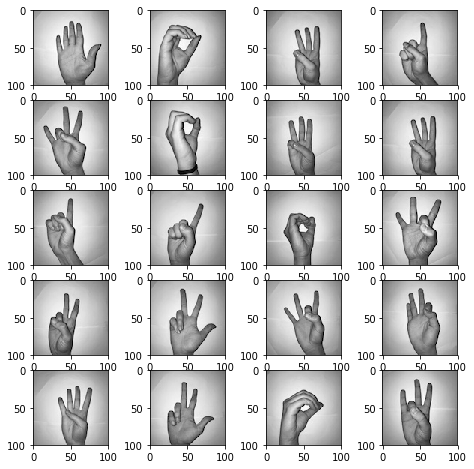

In [23]:
index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [24]:
num_classes = 10

x_train = x_train.reshape(532, 100, 100, 1)
x_test = x_test.reshape(228, 100, 100, 1)

# x_train /= 255  # normalize dataset
# x_test /= 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

532 train samples
228 test samples


In [25]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1))) #padding='same'ทำzero padding มาให้
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       295168    
__________

In [27]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train,
          batch_size=20,
          epochs=100,
          validation_split=0.2)

Train on 425 samples, validate on 107 samples
Epoch 1/100
425/425 [==============================] - 20s 46ms/step - loss: 2.2911 - acc: 0.1176 - val_loss: 2.2858 - val_acc: 0.1495
Epoch 2/100
425/425 [==============================] - 20s 46ms/step - loss: 2.2668 - acc: 0.1741 - val_loss: 2.2766 - val_acc: 0.0841
Epoch 3/100
425/425 [==============================] - 20s 46ms/step - loss: 2.2390 - acc: 0.1553 - val_loss: 2.2674 - val_acc: 0.0841
Epoch 4/100
425/425 [==============================] - 19s 46ms/step - loss: 2.2142 - acc: 0.1694 - val_loss: 2.2583 - val_acc: 0.1589
Epoch 5/100
425/425 [==============================] - 20s 47ms/step - loss: 2.1987 - acc: 0.1624 - val_loss: 2.2706 - val_acc: 0.1495
Epoch 6/100
425/425 [==============================] - 20s 46ms/step - loss: 2.1970 - acc: 0.1812 - val_loss: 2.2555 - val_acc: 0.2150
Epoch 7/100
425/425 [==============================] - 19s 45ms/step - loss: 2.1965 - acc: 0.1718 - val_loss: 2.2580 - val_acc: 0.1495
Epoch 8/1

Epoch 61/100
425/425 [==============================] - 19s 45ms/step - loss: 0.0871 - acc: 0.9812 - val_loss: 1.2878 - val_acc: 0.6916
Epoch 62/100
425/425 [==============================] - 19s 45ms/step - loss: 0.1076 - acc: 0.9765 - val_loss: 0.1341 - val_acc: 0.9533
Epoch 63/100
425/425 [==============================] - 19s 45ms/step - loss: 0.0770 - acc: 0.9812 - val_loss: 0.0890 - val_acc: 0.9907
Epoch 64/100
425/425 [==============================] - 19s 45ms/step - loss: 0.0508 - acc: 0.9929 - val_loss: 2.0599 - val_acc: 0.5888
Epoch 65/100
425/425 [==============================] - 19s 45ms/step - loss: 0.8946 - acc: 0.7882 - val_loss: 0.7098 - val_acc: 0.6636
Epoch 66/100
425/425 [==============================] - 19s 45ms/step - loss: 0.1840 - acc: 0.9459 - val_loss: 0.1869 - val_acc: 0.9439
Epoch 67/100
425/425 [==============================] - 19s 45ms/step - loss: 0.0651 - acc: 0.9882 - val_loss: 0.2089 - val_acc: 0.9252
Epoch 68/100
425/425 [==========================